In [1]:
%run "..\Startup_py3.py"
sys.path.append(r"C:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

38348


# 0. required packages for h5py

In [46]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

# 1. Create field-of-view class

In [3]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20191109_SI16_5kb_chr21_HCT116',
             'save_folder':r'W:\Pu_Temp\20191109_HCT116_5kb_SI13',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20191005-Corrections_3color',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':100,
                     'max_num_seeds': 800,
                     'spot_seeding_th':200,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [4]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=4,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 66
- Number of field of views: 71
- Importing csv file: \\10.245.74.158\Chromatin_NAS_5\20191109_SI16_5kb_chr21_HCT116\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 65 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chromatic_correction_561_647_50_

# 2. Process image into candidate spots

In [10]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                     #_sel_ids=np.arange(41,47),
                     _load_common_reference=True,
                     _load_with_multiple=False,
                     _save_images=True,
                     _warp_images=False, 
                     _overwrite_drift=False,
                     _overwrite_image=False,
                     _overwrite_spot=False,
                     _verbose=True)

-- No folder selected, allow processing all 65 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20191109_SI16_5kb_chr21_HCT116\H0R0\Conv_zscan_04.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20191109_SI16_5kb_chr21_HCT116\H0R0\Conv_zscan_04.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20191109_SI16_5kb_chr21_HCT116\H0R0\Conv_zscan_04.dax  in 32.383s
-- removing hot pixels for channels:['488'] in 12.932s
-- illumination correction for channels: 488, in 2.512s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 48.451s
-- saving fov_info to file: W:\Pu_Temp\20191109_HCT116_5kb_SI13\Conv_zscan_04.hdf5
++ base attributes saved:['ref_im'] in 22.887s.
-- checking unique, region:[1 2 3] in 0.012s.
-- checking unique, region:[4 5 6] in 0.010s.
-- checking unique, region:[7 8 9] in 0.009s

# 3. Find chromosomes

## 3.1 load chromosome image

In [11]:
chrom_im = fov._load_chromosome_image(_type='forward', _overwrite=False)

No forward chrom detected in color usage, generate chromosome with existing data
- Generate chromosome image from unique images, 192 images planned to load.
- loading unique info from file:Conv_zscan_04.hdf5 in 64.548s.
-- shifting images in 107.998s. 
- loading unique info from file:Conv_zscan_04.hdf5 in 64.038s.
-- shifting images in 104.009s. 
- loading unique info from file:Conv_zscan_04.hdf5 in 66.339s.
-- shifting images in 105.928s. 
- loading unique info from file:Conv_zscan_04.hdf5 in 64.217s.
-- shifting images in 104.980s. 
- loading unique info from file:Conv_zscan_04.hdf5 in 52.270s.
-- shifting images in 105.528s. 
- loading unique info from file:Conv_zscan_04.hdf5 in 7.971s.
-- shifting images in 107.248s. 
- loading unique info from file:Conv_zscan_04.hdf5 in 3.427s.
-- shifting images in 40.824s. 
-- finish generating chrom_im in 1008.615s. 
-- saving fov_info to file: W:\Pu_Temp\20191109_HCT116_5kb_SI13\Conv_zscan_04.hdf5
++ base attributes saved:['chrom_im'] in 50.09

## 3.2 find candidate chromosomes

In [13]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_binary_per_th=99.5, 
                                                               _overwrite=True)

-- adjust seed image with filter size=4
-- binarize image with threshold: 99.5%
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.


C:\Users\puzheng\Documents\ImageAnalysis3\segmentation_tools\chromosome.py:79: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  _seg_label = random_walker(adj_chrom_im, _label, beta=10, mode='cg_mg')


-- find objects larger than size=50
-- 195 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 16 threads in 169.773s.
-- saving fov_info to file: W:\Pu_Temp\20191109_HCT116_5kb_SI13\Conv_zscan_04.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.048s.


## 3.3 select among candidate chromosomes

In [14]:
fov._load_from_file('unique')

chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.3,
                                                         _cand_spot_intensity_th=200,
                                                         _save=True, 
                                                         _overwrite=True)

+ loading unique from file: W:\Pu_Temp\20191109_HCT116_5kb_SI13\Conv_zscan_04.hdf5
++ finish loading unique in 0.276s. 
- start select from 195 chromosomes with loss threshold=0.3


C:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if _type in _f.keys():


-- remove chr id 22, percentage of lost rounds:1.000.
-- remove chr id 23, percentage of lost rounds:1.000.
-- remove chr id 25, percentage of lost rounds:1.000.
-- remove chr id 28, percentage of lost rounds:1.000.
-- remove chr id 165, percentage of lost rounds:1.000.
-- remove chr id 0, percentage of lost rounds:0.995.
-- remove chr id 53, percentage of lost rounds:0.995.
-- remove chr id 156, percentage of lost rounds:0.995.
-- remove chr id 64, percentage of lost rounds:0.990.
-- remove chr id 64, percentage of lost rounds:0.990.
-- remove chr id 64, percentage of lost rounds:0.990.
-- remove chr id 98, percentage of lost rounds:0.984.
-- remove chr id 107, percentage of lost rounds:0.984.
-- remove chr id 149, percentage of lost rounds:0.984.
-- remove chr id 7, percentage of lost rounds:0.979.
-- remove chr id 177, percentage of lost rounds:0.979.
-- remove chr id 53, percentage of lost rounds:0.969.
-- remove chr id 89, percentage of lost rounds:0.969.
-- remove chr id 174, per

### visualize chromosomes selections

<IPython.core.display.Javascript object>


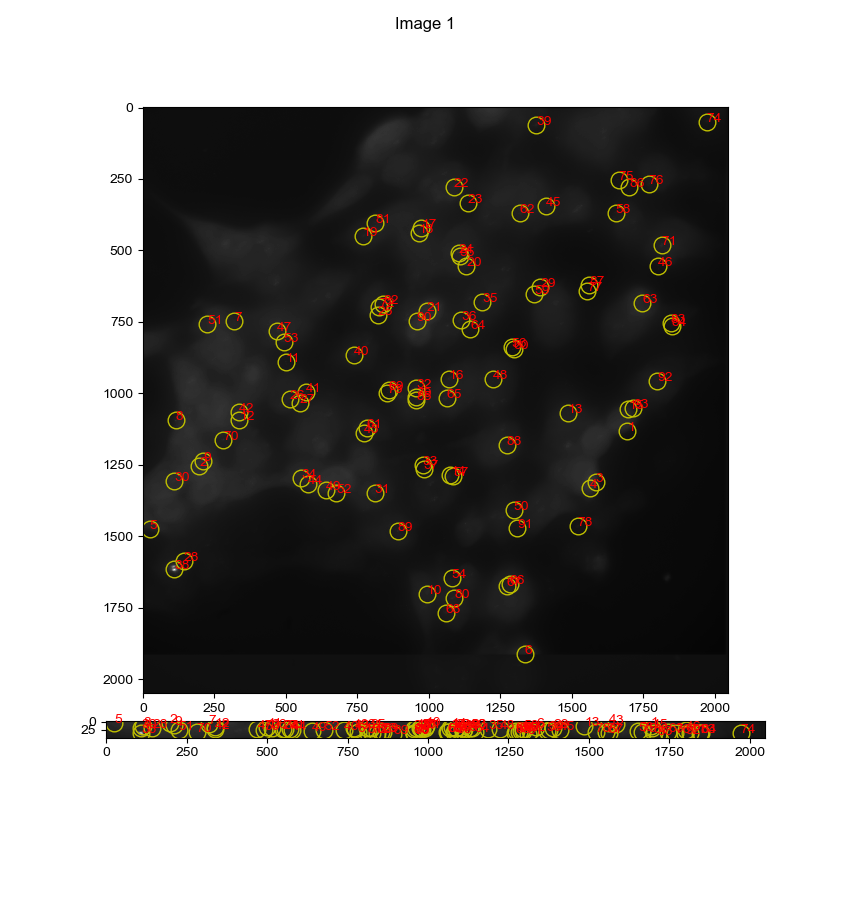

In [16]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

im_class = visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


## select spots based on chromosomes

In [18]:
fov._load_from_file('unique')

+ loading unique from file: W:\Pu_Temp\20191109_HCT116_5kb_SI13\Conv_zscan_04.hdf5


In [20]:
intensity_th = 200
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 93


In [21]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

In [22]:
# select_hzxys close to the chromosome center
dist_th = 4000 # upper limit is 5000nm
intensity_th = 200
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _sel_cands_list = []
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th) & (_cands[:,0]>=intensity_th)])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

### EM pick spots

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 9.997s
-- collapse all regions into 1d.


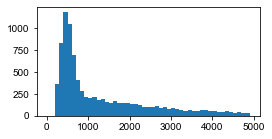

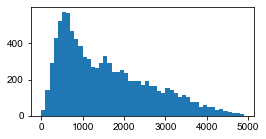

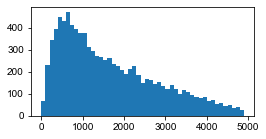

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 10.097s
-- region kept: 0.8659
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 10.696s
-- collapse all regions into 1d.


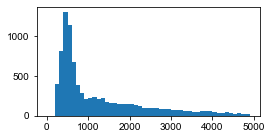

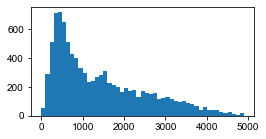

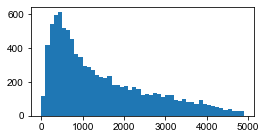

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 10.003s
-- region kept: 0.9572
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 10.799s
-- collapse all regions into 1d.


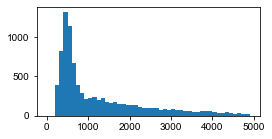

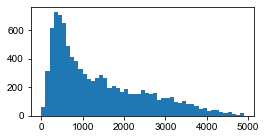

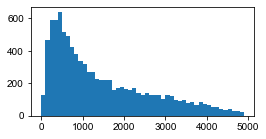

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 9.992s
-- region kept: 0.9775
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 10.797s
-- collapse all regions into 1d.


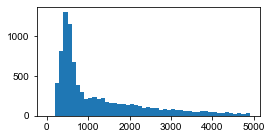

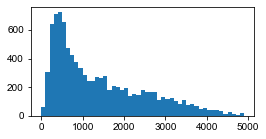

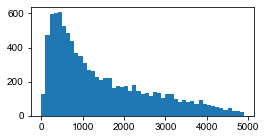

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 9.990s
-- region kept: 0.9829
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 10.800s
-- collapse all regions into 1d.


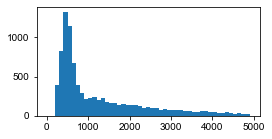

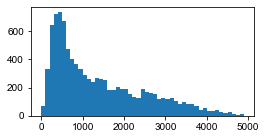

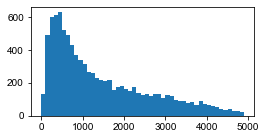

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 10.093s
-- region kept: 0.9818
- iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 9.998s
-- collapse all regions into 1d.


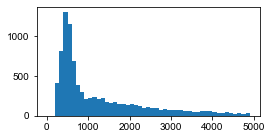

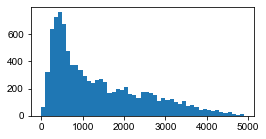

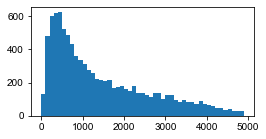

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 9.588s
-- region kept: 0.9831
- iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 10.802s
-- collapse all regions into 1d.


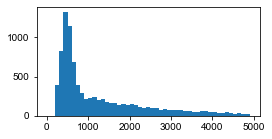

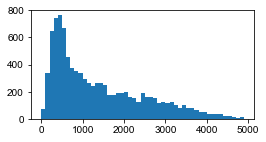

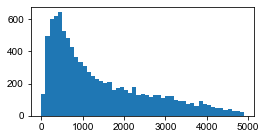

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 9.995s
-- region kept: 0.9848
- iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 10.799s
-- collapse all regions into 1d.


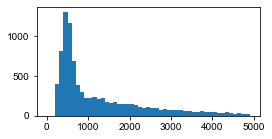

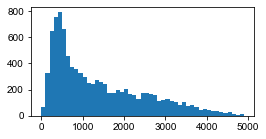

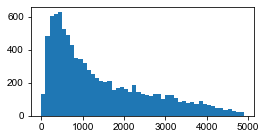

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 10.011s
-- region kept: 0.9867
- iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 9.787s
-- collapse all regions into 1d.


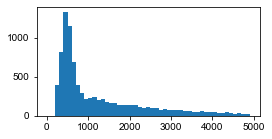

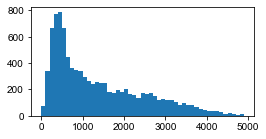

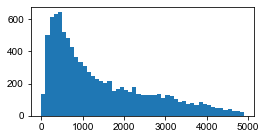

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 9.785s
-- region kept: 0.9863
- iter:9
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 10.799s
-- collapse all regions into 1d.


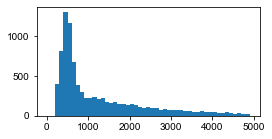

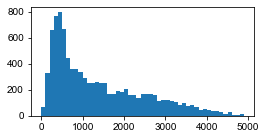

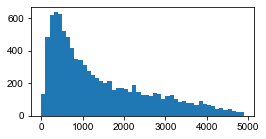

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 10.094s
-- region kept: 0.9874


In [23]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = 12
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.995:
        break

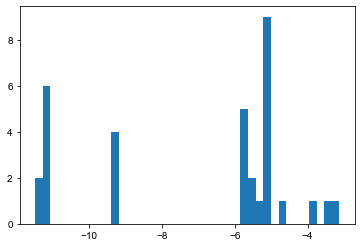

In [24]:
plt.figure()
plt.hist(np.log(sel_dna_scores_list[-1][0]), 40)
plt.show()

In [33]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = np.exp(-10)
int_th = 200
bad_spot_percentage = 0.5

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _bad_inds = _kept_hzxys[:,0] < int_th
    _kept_hzxys[_bad_inds] = np.nan
    #_kept_hzxys[_scores < score_th] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

C:\Users\puzheng\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


0.22572720125786164


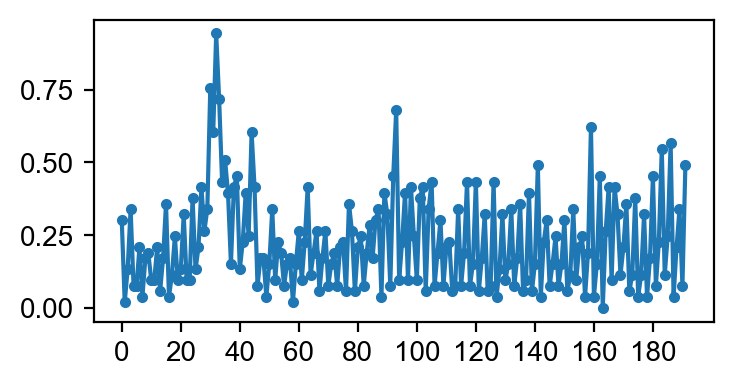

In [34]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_xticks(np.arange(0,len(median_distmap),20))
plt.show()

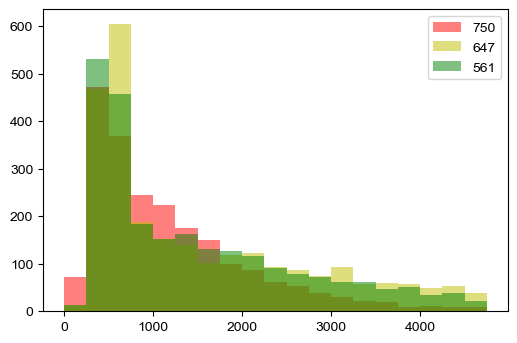

In [35]:
cy7_ints = np.array(final_dna_hzxys_list)[:,0::3,0]
cy5_ints = np.array(final_dna_hzxys_list)[:,1::3,0]
cy3_ints = np.array(final_dna_hzxys_list)[:,2::3,0]

plt.figure(dpi=100)
plt.hist(np.ravel(cy7_ints), bins=np.arange(0,5000,250), 
         alpha=0.5, color='r', label='750')
plt.hist(np.ravel(cy5_ints), bins=np.arange(0,5000,250), 
         alpha=0.5, color='y', label='647')
plt.hist(np.ravel(cy3_ints), bins=np.arange(0,5000,250), 
         alpha=0.5, color='g', label='561')
plt.legend()
plt.show()

In [36]:
kept_inds = np.where(loss_rates<0.5)[0]

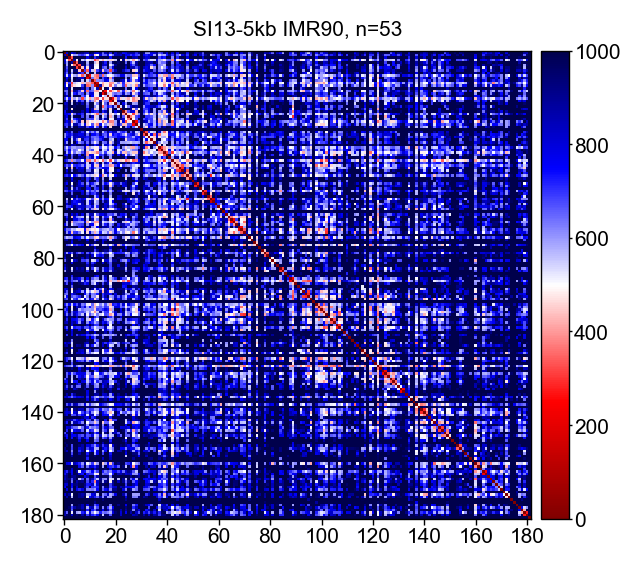

In [38]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#median_distmap,
                                               median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,1000],
                                               ax=ax,
                                               ticks=np.arange(0,len(fov.unique_ids),20), 
                                               figure_dpi=200)
ax.set_title(f"SI13-5kb IMR90, n={len(distmap_list)}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

###### 

## visualize single example

<IPython.core.display.Javascript object>


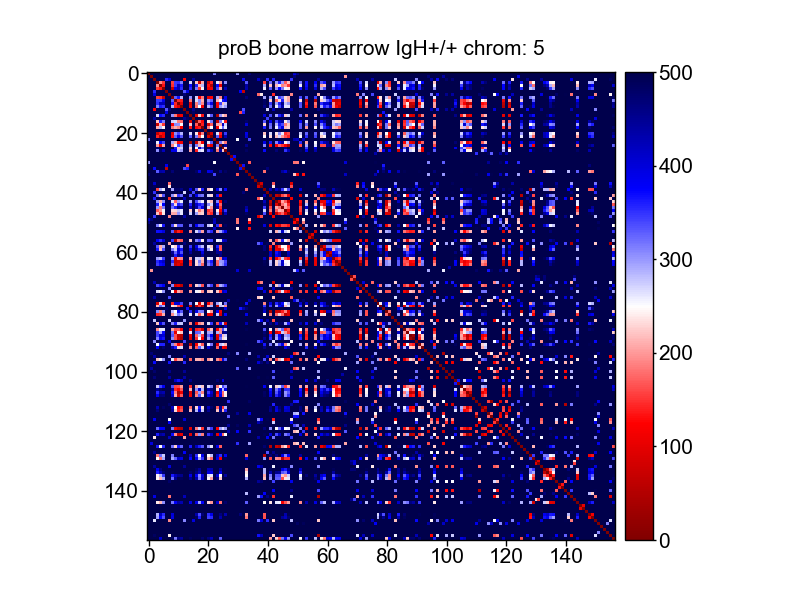

<IPython.core.display.Javascript object>


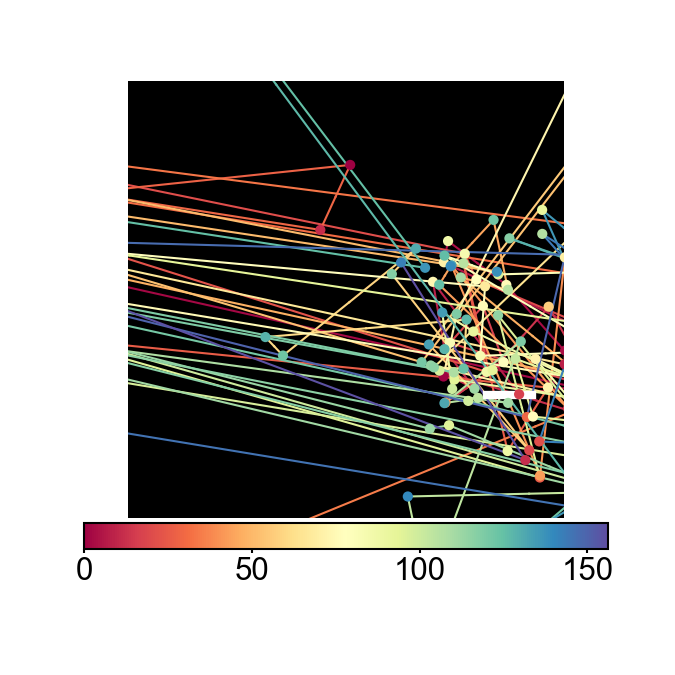

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x0000021C02CD9588>


In [45]:
%matplotlib notebook
chrom_id = 5

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#distmap_list[chrom_id],
                                               distmap_list[chrom_id][valid_inds][:,valid_inds], 
                                               color_limits=[0,500],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"proB bone marrow IgH+/+ chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()



reload(figure_tools.image)
ax3d = figure_tools.image.chromosome_structure_3d_rendering(#final_dna_hzxys_list[chrom_id][:,1:], 
                                                     final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
                                                     marker_edge_line_width=0,
                                                     reference_bar_length=100, image_radius=200, 
                                                     line_width=0.5, figure_dpi=300, depthshade=False)
plt.show()

In [9]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _ind = list(_grp['ids'][:]).index(41)
    print('unique' in _f.keys())

True


In [7]:
_ind

40